Ex 1 Simulate example 2 and draw pictures like below



In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
# @title
N=20 #number of simulation steps
dt=1.0 #time step
T=N*dt #%end time of simulation
t=np.linspace(0,T,N+1) #times 0,t1,t2,...,tN


#true positions,velocities  and accelerations

#ex1: constant velocity
v=0.2
#true positions at times 0,t1,t2,...,tN
xt=v*t
#true velocities at times 0,t1,t2,...,tN
vt=v*np.ones(N+1)
#true accelerations at times 0,t1,t2,...,tN
at=np.zeros(N)

#ex2: constant acceleration
a=0.1
#true positions at times 0,t1,t2,...,tN
xt=1/2*a*t**2
#true velocities at times 0,t1,t2,...,tN
vt=a*t
#true accelerations at times 0,t1,t2,...,tN
at=a*np.ones(N)

#ex3: s-curve
L=3.5 # = x(T) = total length traveled
#true positions at times 0,t1,t2,...,tN
xt=L*(6*(t/T)**5-15*(t/T)**4+10*(t/T)**3)
#true velocities at times 0,t1,t2,...,tN
vt=L/T*(30*(t/T)**4-60*(t/T)**3+30*(t/T)**2)
#true accelerations at times 0,t1,t2,...,tN
at=L/T**2*(120*(t/T)**3-180*(t/T)**2+60*(t/T))

In [ ]:
# @title
sv=0.3 #estimated std of the uncertainty of v i.e true velocity v_k~N(v,sv^2)
q=sv**2*dt**2 #process variance = estimated uncertainty of the model

#estimated uncertainty of the measurements z_k i.e variance r
#i.e true position x_k\sim N(z_k,sz^2)
sz=0.2 #estimated std of the measurements
r=sz**2 #measurement variance

#position measurements (true values + error)
e=np.random.normal(0,sz,N) #measurement errors
z=xt[1:]+e #x-measurements

#velocity measurement
e1=np.random.normal(0,sv,N) #measurement errors
v=vt[:-1]+e1 #x-measurements

#initialization
x0p=0.0; #x_0^+ , estimated position at time t=0
#estimated uncertainty of the initial position i.e variance p_0^+
p0p=1.0**2#  true position x_0~N(x0p,p0p)


# simulation
xm=np.zeros(N) #x_k^- (predictions from state equation)
xp=np.zeros(N) #x_k^+ (updates from state equation + measurements)
pm=np.zeros(N) #p_k^- (variances of predictions)
pp=np.zeros(N) #p_k^+ (variances of updates)
xkm1p=x0p; #x_{k-1}^+ (previous update)
pkm1p=p0p #p_{k-1}^+ (variance of previous update)
K=np.zeros(N) # (Kalman gains)


for k in range(N):
   xkm=xkm1p+v[k]*dt #prediction x_k^-
   xm[k]=xkm  #store as element k
   pkm=pkm1p+q  #predicted variance p_k^-
   pm[k]=pkm #store as element k
   zk=z[k] #measurement at time tk
   Kk=pkm/(pkm+r) #Kalman gain
   K[k]=Kk #store as element k
   xkp=xkm+Kk*(zk-xkm) #update x_k^+
   xp[k]=xkp #store as element k
   pkp=(1-Kk)*pkm #predicted variance p_k^+
   pp[k]=pkp #store as element k
   xkm1p=xkp #previous update
   pkm1p=pkp #variance of the previous update


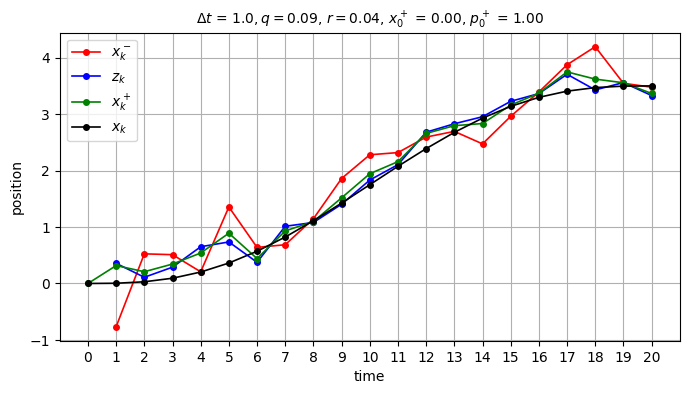

In [ ]:
# @title
#%% predictions, measurements, updates and  true positions
plt.figure(figsize=(8,4))
plt.plot(t[1:],xm,'r.-',linewidth=1.2,markersize=8,label='$x_k^-$')
plt.plot(t[1:],z,'b.-',linewidth=1.2,markersize=8,label='$z_{k}$')
plt.plot(t,np.hstack((x0p,xp)),'g.-',linewidth=1.2,markersize=8,label='$x_k^+$')
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=8,label='$x_k$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('$\Delta t$ = '+str(dt)+'$, q = ${:.2f}'.format(q)+
          ', $r  = ${:.2f}'.format(r)+
          ', $x_0^+$ = {:.2f}'.format(x0p)+', $p_0^+$ = {:.2f}'.format(p0p),
          fontsize=10)
plt.show()

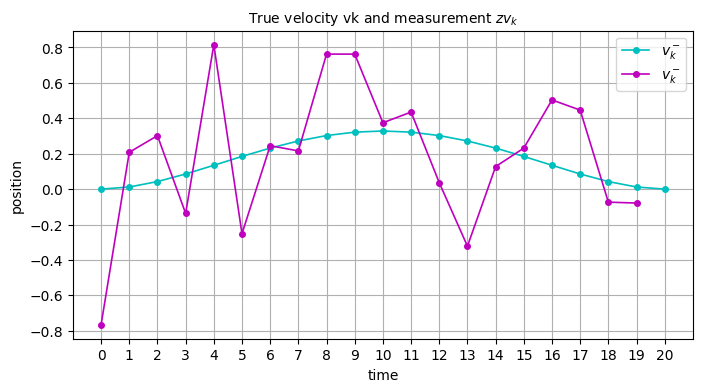

In [ ]:
# @title
plt.figure(figsize=(8,4))
plt.plot(t,vt,'c.-',linewidth=1.2,markersize=8,label='$v_k^-$')
plt.plot(t[:-1],v,'m.-',linewidth=1.2,markersize=8,label='$v_k^-$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('True velocity vk and measurement $zv_k$',
          fontsize=10)
plt.show()

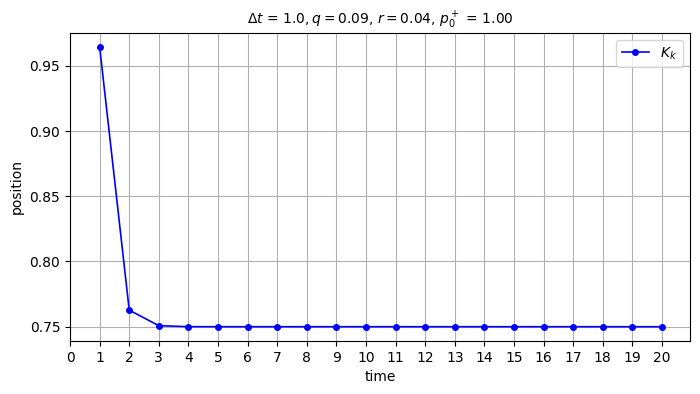

In [ ]:
# @title
plt.figure(figsize=(8,4))
plt.plot(t[1:],K,'b.-',linewidth=1.2,markersize=8,label='$K_k$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('$\Delta t$ = '+str(dt)+'$, q = ${:.2f}'.format(q)+
          ', $r  = ${:.2f}'.format(r)+
          ', $p_0^+$ = {:.2f}'.format(p0p),
          fontsize=10)
plt.show()

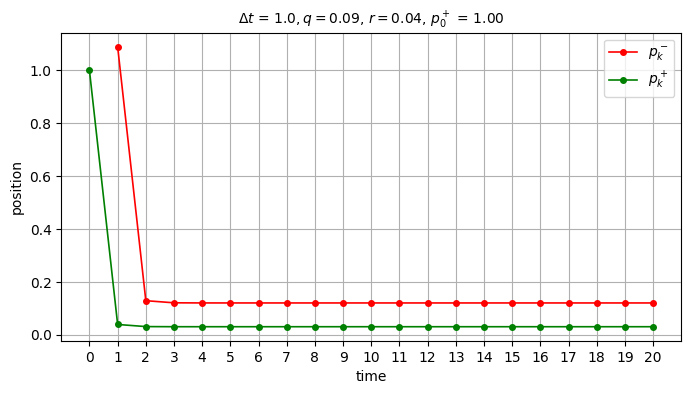

In [ ]:
# @title
plt.figure(figsize=(8,4))
plt.plot(t[1:],pm,'r.-',linewidth=1.2,markersize=8,label='$p_k^-$')
plt.plot(np.hstack((0,t[1:])),np.hstack((p0p,pp)),'g.-',linewidth=1.2,markersize=8,label='$p_k^+$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('$\Delta t$ = '+str(dt)+'$, q = ${:.2f}'.format(q)+
          ', $r  = ${:.2f}'.format(r)+
          ', $p_0^+$ = {:.2f}'.format(p0p),
          fontsize=10)
plt.show()

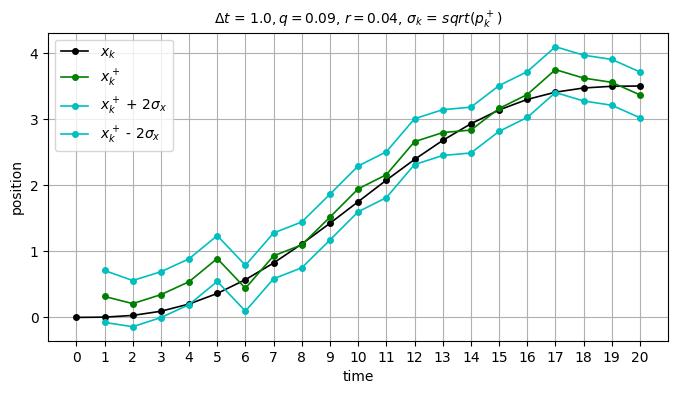

In [ ]:
# @title
sigmak = np.sqrt(pp)

plt.figure(figsize=(8,4))
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=8,label='$x_k$')
plt.plot(t[1:],xp,'g.-',linewidth=1.2,markersize=8,label='$x_k^+$')
plt.plot(t[1:],xp-2*sigmak,'c.-',linewidth=1.2,markersize=8,label='$x_k^+$ + 2$\sigma_{x}$')
plt.plot(t[1:],xp+2*sigmak,'c.-',linewidth=1.2,markersize=8,label='$x_k^+$ - 2$\sigma_{x}$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('$\Delta t$ = '+str(dt)+'$, q = ${:.2f}'.format(q)+
          ', $r  = ${:.2f}'.format(r)+
          ', $\sigma_{k}$ = $sqrt($$p_k^+)$',
          fontsize=10)
plt.show()

Ex2 Simulate example 3, when only position is measured,
 and draw pictures like below

In [ ]:
np.random.seed(0)
N=20 #number of simulation steps
dt=1.0 #time step
T=N*dt #%end time of simulation
t=np.linspace(0,T,N+1) #times 0,t1,t2,...,tN


#true positions,velocities  and accelerations

#ex1: constant velocity
v=0.2
#true positions at times 0,t1,t2,...,tN
xt=v*t
#true velocities at times 0,t1,t2,...,tN
vt=v*np.ones(N+1)
#true accelerations at times 0,t1,t2,...,tN
at=np.zeros(N)

#ex2: constant acceleration
a=0.1
#true positions at times 0,t1,t2,...,tN
xt=1/2*a*t**2
#true velocities at times 0,t1,t2,...,tN
vt=a*t
#true accelerations at times 0,t1,t2,...,tN
at=a*np.ones(N)

#ex3: s-curve
L=3.5 # = x(T) = total length traveled
#true positions at times 0,t1,t2,...,tN
xt=L*(6*(t/T)**5-15*(t/T)**4+10*(t/T)**3)
#true velocities at times 0,t1,t2,...,tN
vt=L/T*(30*(t/T)**4-60*(t/T)**3+30*(t/T)**2)
#true accelerations at times 0,t1,t2,...,tN
at=L/T**2*(120*(t/T)**3-180*(t/T)**2+60*(t/T))

In [ ]:
#%% initialization
x0p=0.0; #x_0^+ , estimated position at time t=0
v0p=1.0; #x_0^+ , estimated velocity at time t=0
X0p=np.array([[x0p,v0p]]).T  #estimated state vector at time t=0

#estimated covariance matrix P_0^+
sx0=1.0 # estimated std (uncertainty) of x_0^+ i.e true x_0~N(x_0+,sx0^2)
sv0=1.5  #estimated std (uncertainty) of v_0^+ i.e true v_0~N(v_0+,sv0^2)
#covariance matrix P_0^+
P0p=np.array([[sx0**2,0],
              [0,sv0**2]])

#state transition matrix
F=np.array([[1,dt],
            [0,1]])

#estimated std of constant random accelerations ak during time intervals i.e ak~N(0,sa^2)
sa=0.5
#process covariance matrix i.e estimated uncertainty of the model
Q=np.array([[1/4*dt**4,1/2*dt**3],
             [1/2*dt**3,dt**2]])*sa**2

#both x and v are measured
#measurement matrix
H=np.array([[1,0]])
#estimated std:s of measurement errors
szx=0.4 #i.e zx~N(xtrue,szx^2) i.e xtrue~N(zx,szx^2)

#measurement covariance matrix
R = szx**2

#measurements (true values + errors)
ex=np.random.normal(0,szx,N) #x-measurement errors
zx=xt[1:]+ex #x-measurements


Z=np.zeros(N)
Z=zx

In [ ]:
from numpy.linalg import inv
# simulation
Xm=np.zeros((2,N)) #X_k^- (predictions from state equation, 2xN-matrix)
Xp=np.zeros((2,N)) #X_k^+ (estimates from state equation + measurements, 2xN-matrix)
Zk=np.zeros((2,N))
Xkm1p=X0p; #X_{k-1}^+ (previous update)
Pm=np.zeros((N,2,2)) #P_k^- (covariance matrices of predictions, Nx2x2-matrix i.e a collection of N 2x2-matrices)
Pp=np.zeros((N,2,2)) #P_k^+ (covariance matrices of updates, 2x2xN-matrix i.e a collection of N 2x2-matrices)
Pkm1p=P0p #P_{k-1}^+ (covariance matrix of previous update)
K=np.zeros((N,2,1)) # (Kalman gains, Nx2x2-matrix i.e a collection of N 2x2-matrices)
I2=np.eye(2) #2x2 identity matrix

for k in range(N):
   Xkm=F@Xkm1p #prediction X_k^-
   Xm[:,k]=Xkm[:,0] #store as column k
   Pkm=F@Pkm1p@F.T+Q  #predicted covariance matrix P_k^- of the prediction X_k^-
   Pm[k]=Pkm #store as k:th 2x2-matrix
   Zk = Z[k]         #measurements at time tk
   Kk=Pkm@H.T@inv(H@Pkm@H.T+R) #Kalman gain
   K[k]=Kk #store as k:th 2x2-matrix
   Xkp=Xkm+Kk@(Zk-H@Xkm) #update X_k^+
   Xp[:,k]=Xkp[:,0] #store as column k
   Pkp=(I2-Kk@H)@Pkm #predicted covariance matrix P_k^+ of the update X_k^+
   Pp[k]=Pkp #store as k:th 2x2-matrix
   Xkm1p=Xkp #new previous update
   Pkm1p=Pkp #new covariance matrix of the previous update

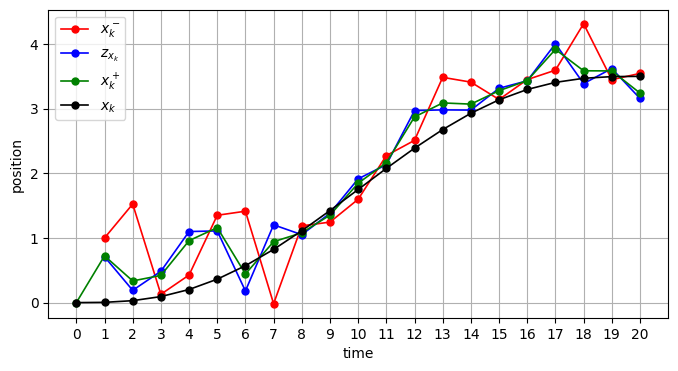

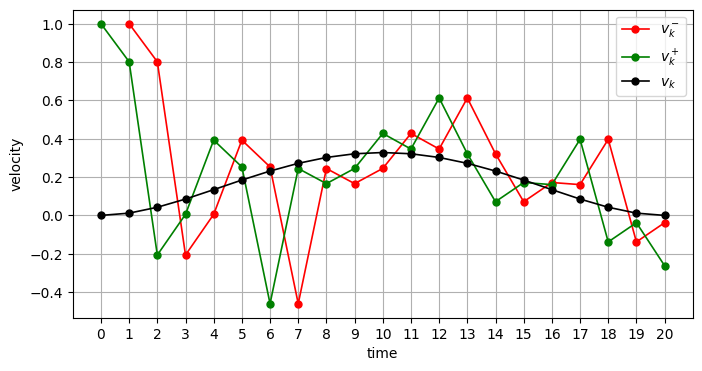

In [ ]:
#%% predictions, measurements, updates and true positions and velocities

xm=Xm[0,:]
vm=Xm[1,:]
xp=Xp[0,:]
vp=Xp[1,:]

plt.figure(figsize=(8,4))
plt.plot(t[1:],xm,'r.-',linewidth=1.2,markersize=10,label='$x_k^-$')
plt.plot(t[1:],zx,'b.-',linewidth=1.2,markersize=10,label='$z_{x_{k}}$')
plt.plot(t,np.hstack((x0p,xp)),'g.-',linewidth=1.2,markersize=10,label='$x_k^+$')
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=10,label='$x_k$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(t[1:],vm,'r.-',linewidth=1.2,markersize=10,label='$v_k^-$')
plt.plot(t,np.hstack((v0p,vp)),'g.-',linewidth=1.2,markersize=10,label='$v_k^+$')
plt.plot(t,vt,'k.-',linewidth=1.2,markersize=10,label='$v_k$')
plt.grid()
plt.legend(fontsize=10,loc='best')
plt.xticks(t)
plt.xlabel('time',fontsize=10)
plt.ylabel('velocity',fontsize=10)
plt.show()

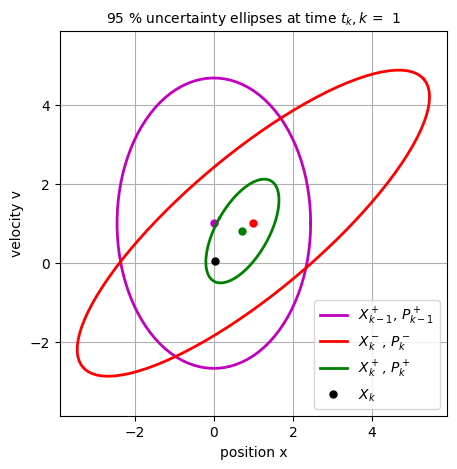

In [ ]:
#%% 95% ellipses at time tk


def ellipsi2D(mu,S,p):
    #mu = mean, 1D-vector
    #S = covariance matrix, (2,2)
    #p = 1.4/6.0/9.2 -> 50/95/99 % ellipse
    vals,vect=np.linalg.eig(S) #eigenvalues and -vectors of S
    la1=vals[0]
    la2=vals[1]
    u=vect[:,0] #unit vector, direction  of semiaxis of length a
    v=vect[:,1] #unit vector, direction  of semiaxis of length b
    a=np.sqrt(p*la1) #length of semiaxis
    b=np.sqrt(p*la2) #length of semiaxis
    #coordinates of the points of ellipse
    t=np.linspace(0,2*np.pi,100)
    co=np.cos(t)
    si=np.sin(t)
    x=mu[0]+a*co*u[0]+b*si*v[0]
    y=mu[1]+a*co*u[1]+b*si*v[1]
    return x,y


k=1


#previous estimate
if k==1:
   mu0=X0p
   S0=P0p
else:
   mu0=Xp[:,k-2]
   S0=Pp[k-2]

[xe0,ve0]=ellipsi2D(mu0,S0,6.0)



#prediction
mu1=Xm[:,k-1]
S1=Pm[k-1]
[xe1,ve1]=ellipsi2D(mu1,S1,6.0)
#update
mu3=Xp[:,k-1]
S3=Pp[k]
[xe3,ve3]=ellipsi2D(mu3,S3,6.0)


plt.figure(figsize=(5,5))
plt.plot(xe0,ve0,'m',linewidth=2,label='$X_{k-1}^+$, $P_{k-1}^+$')
plt.plot(mu0[0],mu0[1],'m.',markersize=10)
plt.plot(xe1,ve1,'r',linewidth=2,label='$X_k^-$, $P_k^-$')
plt.plot(mu1[0],mu1[1],'r.',markersize=10)
plt.plot(xe3,ve3,'g',linewidth=2,label='$X_k^+$, $P_k^+$')
plt.plot(mu3[0],mu3[1],'g.',markersize=10)
plt.plot(xt[k+1],vt[k+1],'k.',markersize=10,label='$X_k$')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=10)
plt.xlabel('position x',fontsize=10)
plt.ylabel('velocity v',fontsize=10)
plt.title('95 % uncertainty ellipses at time $t_k, k$ =  '+str(k),fontsize=10)
plt.show()

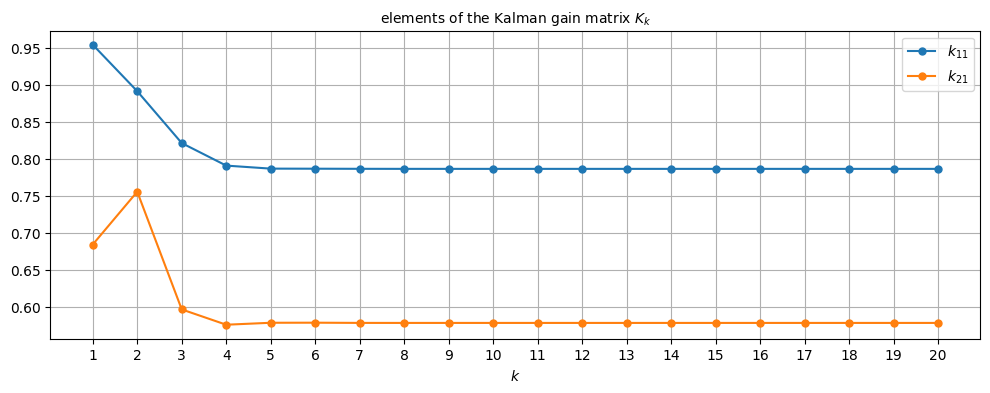

In [ ]:
#%% elements of the Kalman gain matrices K_k

k11=K[:,0,0]
k21=K[:,1,0]

k=np.arange(1,N+1,1)
plt.figure(figsize=(12,4))
plt.plot(k,k11,'.-',markersize=10,label='$k_{11}$')
plt.plot(k,k21,'.-',markersize=10,label='$k_{21}$')
plt.grid()
plt.xticks(k)
plt.legend(fontsize=10)
plt.title('elements of the Kalman gain matrix $K_k$',fontsize=10)
plt.xlabel('$k$',fontsize=10)
plt.show()

Ex 3 Simulate example 4, when position, velocity and
 acceleration are measured, and draw pictures like below

In [ ]:
np.random.seed(0)

N=20 #number of simulation steps
dt=1 #time step
T=N*dt #%end time of simulation
t=np.linspace(0,T,N+1) #times 0,t1,t2,...,tN


#true positions,velocities  and accelerations

#ex1: constant velocity
v=0.2
#true positions at times 0,t1,t2,...,tN
xt=v*t
#true velocities at times 0,t1,t2,...,tN
vt=v*np.ones(N+1)
#true accelerations at times 0,t1,t2,...,tN
at=np.zeros(N)

#ex2: constant acceleration
a=0.1
#true positions at times 0,t1,t2,...,tN
xt=1/2*a*t**2
#true velocities at times 0,t1,t2,...,tN
vt=a*t
#true accelerations at times 0,t1,t2,...,tN
at=a*np.ones(N)

#ex3: s-curve
L=3.5 # = x(T) = total length traveled
#true positions at times 0,t1,t2,...,tN
xt=L*(6*(t/T)**5-15*(t/T)**4+10*(t/T)**3)
#true velocities at times 0,t1,t2,...,tN
vt=L/T*(30*(t/T)**4-60*(t/T)**3+30*(t/T)**2)
#true accelerations at times 0,t1,t2,...,tN
at=L/T**2*(120*(t/T)**3-180*(t/T)**2+60*(t/T))

In [ ]:
#%% initialization
x0p=0.0; #x_0^+ , estimated position at time t=0
v0p=1.0; #x_0^+ , estimated velocity at time t=0
X0p=np.array([[x0p,v0p]]).T  #estimated state vector at time t=0

#estimated covariance matrix P_0^+
sx0=1.0 # estimated std (uncertainty) of x_0^+ i.e true x_0~N(x_0+,sx0^2)
sv0=1.5  #estimated std (uncertainty) of v_0^+ i.e true v_0~N(v_0+,sv0^2)
#covariance matrix P_0^+
P0p=np.array([[sx0**2,0],
              [0,sv0**2]])

#state transition matrix
F=np.array([[1,dt],
            [0,1]])


#both x and v are measured
#measurement matrix
H=np.array([[1,0],
            [0,1]])
#estimated std:s of measurement errors
szx=0.4 #i.e zx~N(xtrue,szx^2) i.e xtrue~N(zx,szx^2)
szv=0.6 #i.e zv~N(vtrue,szv^2) i.e vtrue~N(zv,szv^2)
sza=0.1 #i.e zv~N(atrue,sza^2) i.e vtrue~N(za,sza^2)

R=np.array([[szx**2,0],
              [0,szv**2]])

Q=np.array([[1/4*dt**4,1/2*dt**3],
             [1/2*dt**3,dt**2]])*sza**2

#measurements (true values + errors)
ex=np.random.normal(0,szx,N) #x-measurement errors
zx=xt[1:]+ex #x-measurements
ev=np.random.normal(0,szv,N) #v-measurement errors
zv=vt[1:]+ev #v-measurements
ea=np.random.normal(0,sza,N) #v-measurement errors
za=at[:-1]+ea #v-measurements

#Control matrix
B=np.array([[0.5*(dt**2)],
            [dt]])

Z=np.zeros((2,N))
Z[0,:]=zx
Z[1,:]=zv

In [ ]:
from numpy.linalg import inv
# simulation
Xm=np.zeros((2,N)) #X_k^- (predictions from state equation, 2xN-matrix)
Xp=np.zeros((2,N)) #X_k^+ (estimates from state equation + measurements, 2xN-matrix)
Xkm1p=X0p; #X_{k-1}^+ (previous update)
Pm=np.zeros((N,2,2)) #P_k^- (covariance matrices of predictions, Nx2x2-matrix i.e a collection of N 2x2-matrices)
Pp=np.zeros((N,2,2)) #P_k^+ (covariance matrices of updates, 2x2xN-matrix i.e a collection of N 2x2-matrices)
Pkm1p=P0p #P_{k-1}^+ (covariance matrix of previous update)
K=np.zeros((N,2,2)) # (Kalman gains, Nx2x2-matrix i.e a collection of N 2x2-matrices)
I2=np.eye(2) #2x2 identity matrix

for k in range(N):
   Xkm=F@Xkm1p+B*za[k] #prediction X_k^-
   Xm[:,k]=Xkm[:,0] #store as column k
   Pkm=F@Pkm1p@F.T+Q  #predicted covariance matrix P_k^- of the prediction X_k^-
   Pm[k]=Pkm #store as k:th 2x2-matrix
   Zk=Z[:,k].reshape(2,1) #measurements at time tk
   Kk=Pkm@H.T@inv(H@Pkm@H.T+R) #Kalman gain
   K[k]=Kk #store as k:th 2x2-matrix
   Xkp=Xkm+Kk@(Zk-H@Xkm) #update X_k^+
   Xp[:,k]=Xkp[:,0] #store as column k
   Pkp=(I2-Kk@H)@Pkm #predicted covariance matrix P_k^+ of the update X_k^+
   Pp[k]=Pkp #store as k:th 2x2-matrix
   Xkm1p=Xkp #new previous update
   Pkm1p=Pkp #new covariance matrix of the previous update

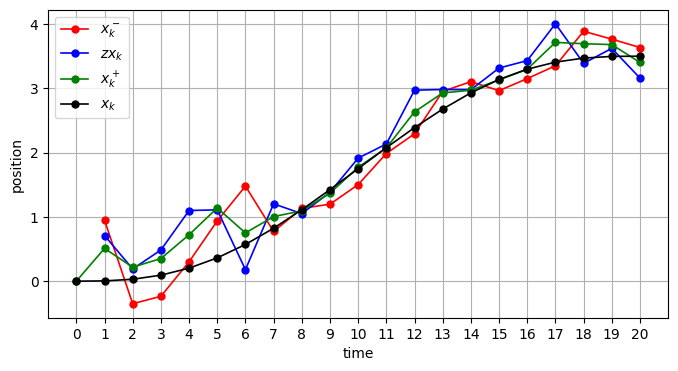

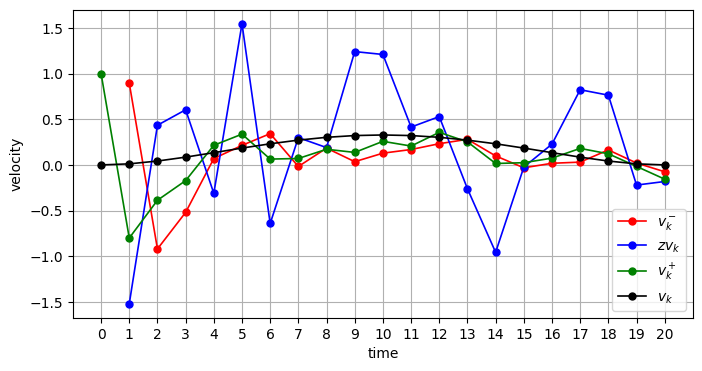

In [ ]:
#%% predictions, measurements, updates and true positions and velocities
xm=Xm[0,:]
vm=Xm[1,:]
xp=Xp[0,:]
vp=Xp[1,:]

plt.figure(figsize=(8,4))
plt.plot(t[1:],xm,'r.-',linewidth=1.2,markersize=10,label='$x_k^-$')
plt.plot(t[1:],zx,'b.-',linewidth=1.2,markersize=10,label='$zx_{k}$')
plt.plot(t,np.hstack((x0p,xp)),'g.-',linewidth=1.2,markersize=10,label='$x_k^+$')
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=10,label='$x_k$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(t[1:],vm,'r.-',linewidth=1.2,markersize=10,label='$v_k^-$')
plt.plot(t[1:],zv,'b.-',linewidth=1.2,markersize=10,label='$zv_{k}$')
plt.plot(t,np.hstack((v0p,vp)),'g.-',linewidth=1.2,markersize=10,label='$v_k^+$')
plt.plot(t,vt,'k.-',linewidth=1.2,markersize=10,label='$v_k$')
plt.grid()
plt.legend(fontsize=10,loc='best')
plt.xticks(t)
plt.xlabel('time',fontsize=10)
plt.ylabel('velocity',fontsize=10)
plt.show()

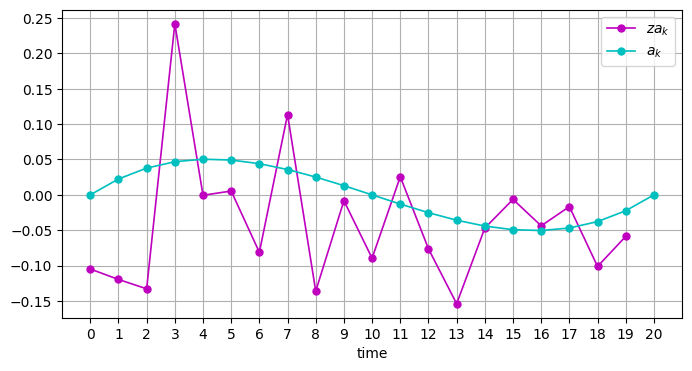

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t[:-1],za,'m.-',linewidth=1.2,markersize=10,label='$za_k$')
plt.plot(t,at,'c.-',linewidth=1.2,markersize=10,label='$a_{k}$')
plt.grid()
plt.legend(fontsize=10,loc='best')
plt.xticks(t)
plt.xlabel('time',fontsize=10)
plt.show()

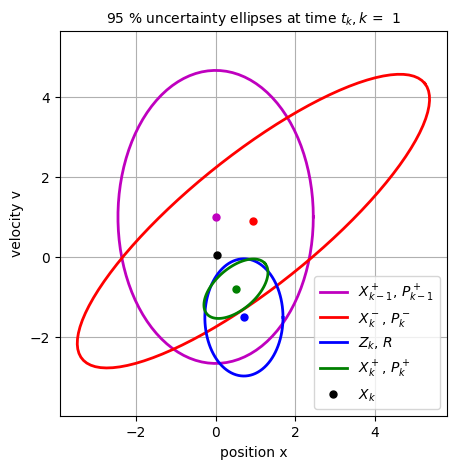

In [ ]:
#%% 95% ellipses at time tk


def ellipsi2D(mu,S,p):
    #mu = mean, 1D-vector
    #S = covariance matrix, (2,2)
    #p = 1.4/6.0/9.2 -> 50/95/99 % ellipse
    vals,vect=np.linalg.eig(S) #eigenvalues and -vectors of S
    la1=vals[0]
    la2=vals[1]
    u=vect[:,0] #unit vector, direction  of semiaxis of length a
    v=vect[:,1] #unit vector, direction  of semiaxis of length b
    a=np.sqrt(p*la1) #length of semiaxis
    b=np.sqrt(p*la2) #length of semiaxis
    #coordinates of the points of ellipse
    t=np.linspace(0,2*np.pi,100)
    co=np.cos(t)
    si=np.sin(t)
    x=mu[0]+a*co*u[0]+b*si*v[0]
    y=mu[1]+a*co*u[1]+b*si*v[1]
    return x,y


k=1


#previous estimate
if k==1:
   mu0=X0p
   S0=P0p
else:
   mu0=Xp[:,k-2]
   S0=Pp[k-2]

[xe0,ve0]=ellipsi2D(mu0,S0,6.0)



#prediction
mu1=Xm[:,k-1]
S1=Pm[k-1]
[xe1,ve1]=ellipsi2D(mu1,S1,6.0)
#measurement
mu2=Z[:,k-1]
S2=R
[xe2,ve2]=ellipsi2D(mu2,S2,6.0)
#update
mu3=Xp[:,k-1]
S3=Pp[k]
[xe3,ve3]=ellipsi2D(mu3,S3,6.0)


plt.figure(figsize=(5,5))
plt.plot(xe0,ve0,'m',linewidth=2,label='$X_{k-1}^+$, $P_{k-1}^+$')
plt.plot(mu0[0],mu0[1],'m.',markersize=10)
plt.plot(xe1,ve1,'r',linewidth=2,label='$X_k^-$, $P_k^-$')
plt.plot(mu1[0],mu1[1],'r.',markersize=10)
plt.plot(xe2,ve2,'b',linewidth=2,label='$Z_k$, $R$')
plt.plot(mu2[0],mu2[1],'b.',markersize=10)
plt.plot(xe3,ve3,'g',linewidth=2,label='$X_k^+$, $P_k^+$')
plt.plot(mu3[0],mu3[1],'g.',markersize=10)
plt.plot(xt[k+1],vt[k+1],'k.',markersize=10,label='$X_k$')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=10)
plt.xlabel('position x',fontsize=10)
plt.ylabel('velocity v',fontsize=10)
plt.title('95 % uncertainty ellipses at time $t_k, k$ =  '+str(k),fontsize=10)
plt.show()

Ex 4: Simulate example 5 when position, velocity and acceleration are measured,

In [ ]:
np.random.seed(0)

N=20 #number of simulation steps
dt=0.5 #time step
T=N*dt #%end time of simulation
t=np.linspace(0,T,N+1) #times 0,t1,t2,...,tN


#true positions,velocities  and accelerations

#ex1: constant velocity
v=0.2
#true positions at times 0,t1,t2,...,tN
xt=v*t
#true velocities at times 0,t1,t2,...,tN
vt=v*np.ones(N+1)
#true accelerations at times 0,t1,t2,...,tN
at=np.zeros(N)

#ex2: constant acceleration
a=0.1
#true positions at times 0,t1,t2,...,tN
xt=1/2*a*t**2
#true velocities at times 0,t1,t2,...,tN
vt=a*t
#true accelerations at times 0,t1,t2,...,tN
at=a*np.ones(N)

#ex3: s-curve
L=3.5 # = x(T) = total length traveled
#true positions at times 0,t1,t2,...,tN
xt=L*(6*(t/T)**5-15*(t/T)**4+10*(t/T)**3)
#true velocities at times 0,t1,t2,...,tN
vt=L/T*(30*(t/T)**4-60*(t/T)**3+30*(t/T)**2)
#true accelerations at times 0,t1,t2,...,tN
at=L/T**2*(120*(t/T)**3-180*(t/T)**2+60*(t/T))

In [ ]:
#%% initialization
x0p=0.0; #x_0^+ , estimated position at time t=0
v0p=0.0; #x_0^+ , estimated velocity at time t=0
a0p=0.0; #x_0^+ , estimated acceleration at time t=0
X0p=np.array([[x0p,v0p,a0p]]).T  #estimated state vector at time t=0

#estimated covariance matrix P_0^+
sx0=5.0 # estimated std (uncertainty) of x_0^+ i.e true x_0~N(x_0+,sx0^2)
sv0=5.0  #estimated std (uncertainty) of v_0^+ i.e true v_0~N(v_0+,sv0^2)
sa0=5.0  #estimated std (uncertainty) of a_0^+ i.e true a_0~N(a_0+,sa0^2)

#covariance matrix P_0^+
P0p=np.array([[sx0**2,0,0],
              [0,sv0**2,0],
              [0,0,sa0**2]])

#state transition matrix
F=np.array([[1,dt,0.5*(dt)**2],
            [0,1,dt],
            [0,0,1]])


#both x and v are measured
#measurement matrix
H=np.array([[1,0,0],
            [0,1,0],
            [0,0,1]])
#estimated std:s of measurement errors
szx=0.2 #i.e zx~N(xtrue,szx^2) i.e xtrue~N(zx,szx^2)
szv=0.3 #i.e zv~N(vtrue,szv^2) i.e vtrue~N(zv,szv^2)
sza=0.4 #i.e zv~N(atrue,sza^2) i.e vtrue~N(za,sza^2)

R=np.array([[szx**2,0,0],
            [0,szv**2,0],
            [0,0,sza**2]])

#estimated std of constant random accelerations ak during time intervals i.e ak~N(0,sa^2)
sa=0.1
#process covariance matrix i.e estimated uncertainty of the model
Q=np.array([[1/4*dt**4,1/2*dt**3,0.5*(dt)**2],
             [1/2*dt**3,dt**2,dt],
            [0.5*(dt)**2,dt,1]])*sa**2

#measurements (true values + errors)
ex=np.random.normal(0,szx,N) #x-measurement errors
zx=xt[1:]+ex #x-measurements
ev=np.random.normal(0,szv,N) #v-measurement errors
zv=vt[1:]+ev #v-measurements
ea=np.random.normal(0,sza,N) #v-measurement errors
za=at[1:]+ea #v-measurements

Z=np.zeros((3,N))
Z[0,:]=zx
Z[1,:]=zv
Z[2,:]=za

In [ ]:
from numpy.linalg import inv
# simulation
Xm=np.zeros((3,N)) #X_k^- (predictions from state equation, 3xN-matrix)
Xp=np.zeros((3,N)) #X_k^+ (estimates from state equation + measurements, 3xN-matrix)
Zk=np.zeros((3,N))
Xkm1p=X0p; #X_{k-1}^+ (previous update)
Pm=np.zeros((N,3,3)) #P_k^- (covariance matrices of predictions, Nx3x3-matrix i.e a collection of N 3x3-matrices)
Pkplist=np.zeros((N,3,3))
Pp=np.zeros((N,3,3)) #P_k^+ (covariance matrices of updates, 3x3xN-matrix i.e a collection of N 3x3-matrices)
Pkm1p=P0p #P_{k-1}^+ (covariance matrix of previous update)
K=np.zeros((N,3,3)) # (Kalman gains, Nx3x3-matrix i.e a collection of N 3x3-matrices)
I3=np.eye(3) #3x3 identity matrix

for k in range(N):
   Xkm=F@Xkm1p #prediction X_k^-
   Xm[:,k]=Xkm[:,0] #store as column k
   Pkm=F@Pkm1p@F.T+Q  #predicted covariance matrix P_k^- of the prediction X_k^-
   Pm[k]=Pkm #store as k:th 3x3-matrix
   Zk=Z[:,k].reshape(3,1) #measurements at time tk
   Kk=Pkm@H.T@inv(H@Pkm@H.T+R) #Kalman gain
   K[k]=Kk #store as k:th 3x3-matrix
   Xkp=Xkm+Kk@(Zk-H@Xkm) #update X_k^+
   Xp[:,k]=Xkp[:,0] #store as column k
   Pkp=(I3-Kk@H)@Pkm #predicted covariance matrix P_k^+ of the update X_k^+
   Pp[k]=Pkp #store as k:th 3x3-matrix
   Xkm1p=Xkp #new previous update
   Pkm1p=Pkp #new covariance matrix of the previous update

for k in range(N):
    for i in range(len(Pp[k])):
        Pkplist[k][i] = Pp[k][i][i]

Pkplistx = Pkplist[:, 0, 0]
Pkplistv = Pkplist[:, 1, 1]
Pkplista = Pkplist[:, 2, 2]

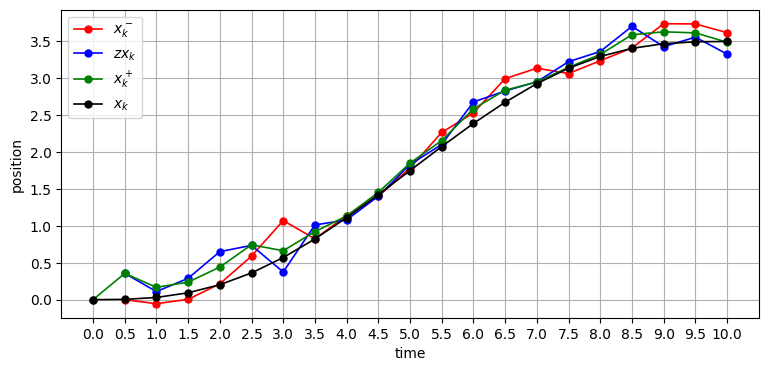

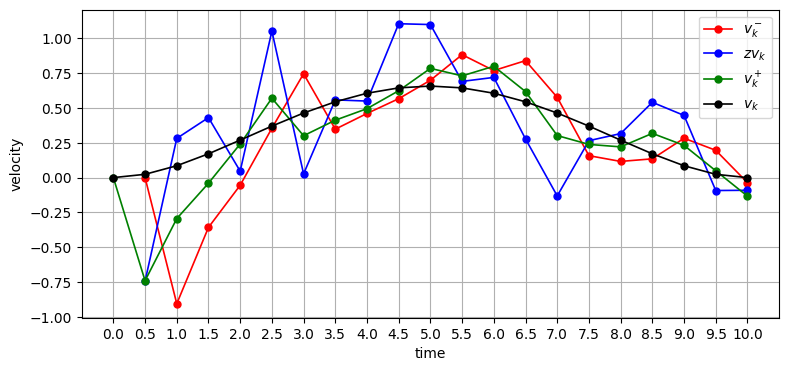

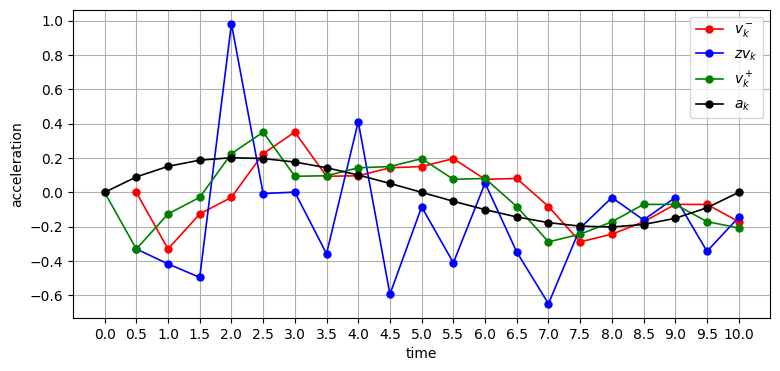

In [ ]:
#%% predictions, measurements, updates and true positions and velocities
xm=Xm[0,:]
vm=Xm[1,:]
am=Xm[2,:]
xp=Xp[0,:]
vp=Xp[1,:]
ap=Xp[2,:]

plt.figure(figsize=(9,4))
plt.plot(t[1:],xm,'r.-',linewidth=1.2,markersize=10,label='$x_k^-$')
plt.plot(t[1:],zx,'b.-',linewidth=1.2,markersize=10,label='$zx_{k}$')
plt.plot(t,np.hstack((x0p,xp)),'g.-',linewidth=1.2,markersize=10,label='$x_k^+$')
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=10,label='$x_k$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.show()

plt.figure(figsize=(9,4))
plt.plot(t[1:],vm,'r.-',linewidth=1.2,markersize=10,label='$v_k^-$')
plt.plot(t[1:],zv,'b.-',linewidth=1.2,markersize=10,label='$zv_{k}$')
plt.plot(t,np.hstack((v0p,vp)),'g.-',linewidth=1.2,markersize=10,label='$v_k^+$')
plt.plot(t,vt,'k.-',linewidth=1.2,markersize=10,label='$v_k$')
plt.grid()
plt.legend(fontsize=10,loc='best')
plt.xticks(t)
plt.xlabel('time',fontsize=10)
plt.ylabel('velocity',fontsize=10)
plt.show()

plt.figure(figsize=(9,4))
plt.plot(t[1:],am,'r.-',linewidth=1.2,markersize=10,label='$v_k^-$')
plt.plot(t[1:],za,'b.-',linewidth=1.2,markersize=10,label='$zv_{k}$')
plt.plot(t,np.hstack((a0p,ap)),'g.-',linewidth=1.2,markersize=10,label='$v_k^+$')
plt.plot(t,at,'k.-',linewidth=1.2,markersize=10,label='$a_k$')
plt.grid()
plt.legend(fontsize=10,loc='best')
plt.xticks(t)
plt.xlabel('time',fontsize=10)
plt.ylabel('acceleration',fontsize=10)
plt.show()

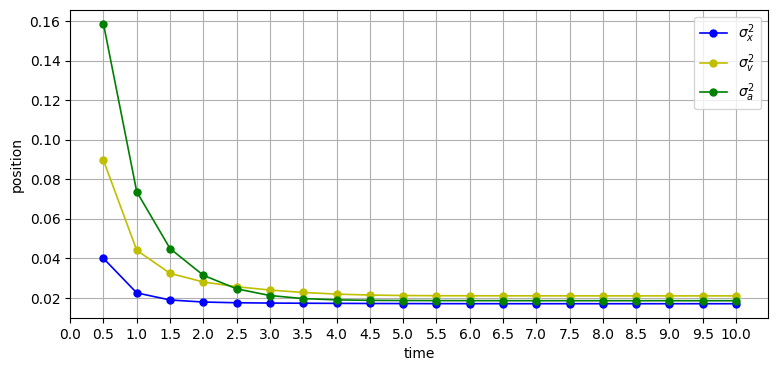

In [ ]:
plt.figure(figsize=(9,4))
plt.grid()
plt.plot(t[1:], Pkplistx, 'b.-', linewidth=1.2, markersize=10, label='$\sigma^2_{x}$')
plt.plot(t[1:], Pkplistv, 'y.-', linewidth=1.2, markersize=10, label='$\sigma^2_{v}$')
plt.plot(t[1:], Pkplista, 'g.-', linewidth=1.2, markersize=10, label='$\sigma^2_{a}$')
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.show()

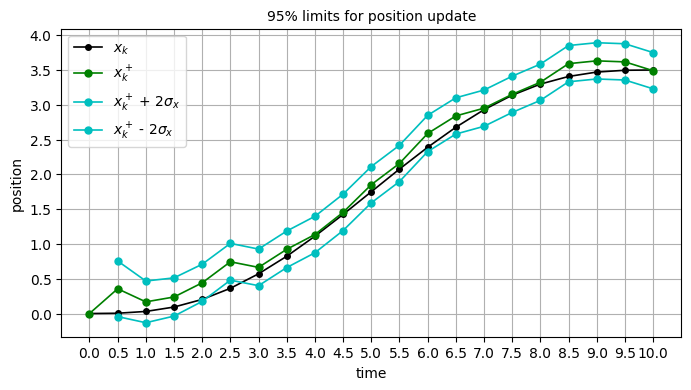

In [ ]:
# @title

plt.figure(figsize=(8,4))
plt.plot(t,xt,'k.-',linewidth=1.2,markersize=8,label='$x_k$')
plt.plot(t,np.hstack((x0p,xp)),'g.-',linewidth=1.2,markersize=10,label='$x_k^+$')
plt.plot(t[1:],xp-2*np.sqrt(Pkplistx),'c.-',linewidth=1.2,markersize=10,label='$x_k^+$ + 2$\sigma_{x}$')
plt.plot(t[1:],xp+2*np.sqrt(Pkplistx),'c.-',linewidth=1.2,markersize=10,label='$x_k^+$ - 2$\sigma_{x}$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('95% limits for position update', fontsize=10)
plt.show()



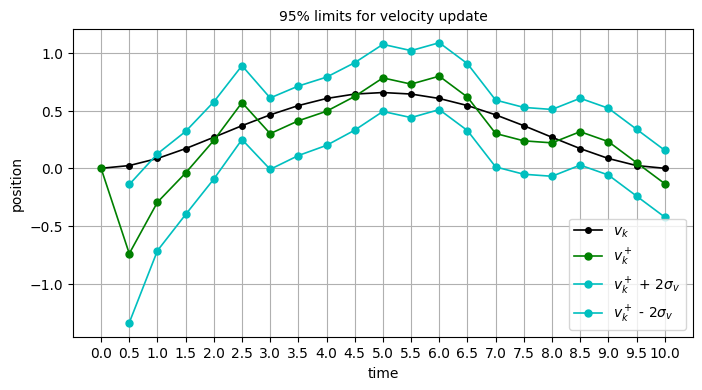

In [ ]:
# @title

plt.figure(figsize=(8,4))
plt.plot(t,vt,'k.-',linewidth=1.2,markersize=8,label='$v_k$')
plt.plot(t,np.hstack((v0p,vp)),'g.-',linewidth=1.2,markersize=10,label='$v_k^+$')
plt.plot(t[1:],vp-2*np.sqrt(Pkplistv),'c.-',linewidth=1.2,markersize=10,label='$v_k^+$ + 2$\sigma_{v}$')
plt.plot(t[1:],vp+2*np.sqrt(Pkplistv),'c.-',linewidth=1.2,markersize=10,label='$v_k^+$ - 2$\sigma_{v}$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('95% limits for velocity update', fontsize=10)
plt.show()



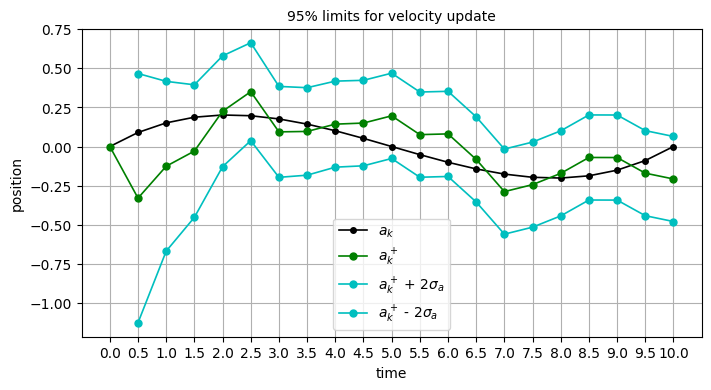

In [ ]:
# @title

plt.figure(figsize=(8,4))
plt.plot(t,at,'k.-',linewidth=1.2,markersize=8,label='$a_k$')
plt.plot(t,np.hstack((a0p,ap)),'g.-',linewidth=1.2,markersize=10,label='$a_k^+$')
plt.plot(t[1:],ap-2*np.sqrt(Pkplista),'c.-',linewidth=1.2,markersize=10,label='$a_k^+$ + 2$\sigma_{a}$')
plt.plot(t[1:],ap+2*np.sqrt(Pkplista),'c.-',linewidth=1.2,markersize=10,label='$a_k^+$ - 2$\sigma_{a}$')
plt.grid()
plt.legend(fontsize=10)
plt.xticks(t)
plt.ylabel('position',fontsize=10)
plt.xlabel('time',fontsize=10)
plt.title('95% limits for velocity update', fontsize=10)
plt.show()

